# Astronomical Survey Conditions

If you are trying to build a set of simulated data with the same characteristics as astronomical survey experiments, then look no further than the `deeplenstronomy.surveys` functionality.

In [1]:
from deeplenstronomy import surveys

The available surveys are:

In [2]:
[x for x in dir(surveys) if not x.startswith('__')]

['delve', 'des', 'euclid', 'hst', 'lsst', 'ztf']

If you operate in one of these modes, the `IMAGE` and `SURVEY` sections of your configuration file will be overwritten with the characteristics of the specified astronomical survey. These characteristics are found in the `surveys` module.

For example, we can look at the Hubble Space Telescope (`hst`):

In [3]:
from inspect import getsource
print(getsource(surveys.hst))

def hst():
    info = """
IMAGE:
    PARAMETERS:
        exposure_time: 5400.0
        numPix: 100
        pixel_scale: 0.08
        psf_type: 'GAUSSIAN'
        read_noise: 4
        ccd_gain: 2.5
SURVEY:
    PARAMETERS:
        BANDS: F160W
        seeing: 0.08
        magnitude_zero_point: 25.96
        sky_brightness: 22.3
        num_exposures: 1
"""
    return info



These are the `IMAGE` and `SURVEY` conditions needed to produce Hubble Space Telescope-like images.

## Simulating a dataset with survey conditions

`deeplenstronomy` offers a simple way of introducing these pre-written sections into your configuration file through its `make_dataset()` function. Just set `survey` to the desired survey from the list above.

In [4]:
import deeplenstronomy.deeplenstronomy as dl
from deeplenstronomy.visualize import view_image

In [5]:
dataset = dl.make_dataset('data/demo.yaml', survey='hst', store_in_memory=False, store_sample=True, verbose=True)

Entering main organization loop
Organizing CONFIGURATION_1
Organizing CONFIGURATION_2
Organizing CONFIGURATION_3
Organizing CONFIGURATION_4
Generating images for CONFIGURATION_1
	Progress: 100.0 %  ---  Elapsed Time: 0 H 0 M 0 S
Generating images for CONFIGURATION_2
	Progress: 100.0 %  ---  Elapsed Time: 0 H 0 M 0 S
Generating images for CONFIGURATION_3
	Progress: 100.0 %  ---  Elapsed Time: 0 H 0 M 0 S
Generating images for CONFIGURATION_4
	Progress: 100.0 %  ---  Elapsed Time: 0 H 0 M 3 S


We can inspect the image using `deeplenstornomy`'s built-in visualization functions.

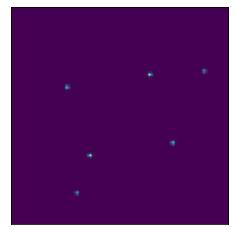

In [6]:
view_image(dataset.CONFIGURATION_4_images[4][0])

We can compare to a different survey, with noticeable different image quality:

In [7]:
new_dataset = dl.make_dataset('data/demo.yaml', survey='ztf', store_in_memory=False, store_sample=True, verbose=True)

Entering main organization loop
Organizing CONFIGURATION_1
Organizing CONFIGURATION_2
Organizing CONFIGURATION_3
Organizing CONFIGURATION_4
Generating images for CONFIGURATION_1
	Progress: 100.0 %  ---  Elapsed Time: 0 H 0 M 1 S
Generating images for CONFIGURATION_2
	Progress: 100.0 %  ---  Elapsed Time: 0 H 0 M 1 S
Generating images for CONFIGURATION_3
	Progress: 100.0 %  ---  Elapsed Time: 0 H 0 M 1 S
Generating images for CONFIGURATION_4
	Progress: 100.0 %  ---  Elapsed Time: 0 H 0 M 6 S


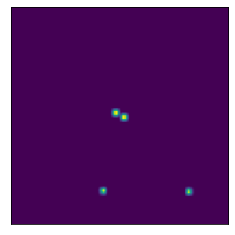

In [8]:
view_image(new_dataset.CONFIGURATION_4_images[2][0])

In `new_dataset` we are not simulating exactly the same system, since new parameters are drawn from specified distributions each time `make_dataset()` is called. However, the difference in `seeing` and `pixel_scale` between the Zwicky Transient Facility and the Hubble Space Telescope are certainly observable.